# Linear Regression - Auto Dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

## Data Gathering

In [2]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 1. symboling

In [6]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [7]:
df['symboling'].nunique()

6

In [8]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

### 2. normalized-losses

In [9]:
df['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [10]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [11]:
df.replace({'?':np.nan},inplace=True)

In [12]:
df['normalized-losses'].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [13]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
df.isna().mean() * 100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [15]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [16]:
df['normalized-losses'].mean()

122.0

In [17]:
df['normalized-losses'].median()

115.0

In [18]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [19]:
df['normalized-losses'].isna().sum()

0

In [20]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

### 3. make

In [21]:
df['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [22]:
df['make'].nunique()

22

In [23]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

### 4. fuel-type

In [25]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [26]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [27]:
# Label Encoding  --> used for ordinal data
df['fuel-type'].replace({'gas':1, 'diesel':0}, inplace=True)

In [98]:
fuel_type_value = {'gas':1, 'diesel':0}

In [28]:
df['fuel-type'].value_counts()

1    185
0     20
Name: fuel-type, dtype: int64

### 5. aspiration

In [29]:
df['aspiration']

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [30]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [31]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [32]:
# Label Encoding  --> used for ordinal data
df['aspiration'].replace({'std': 0, 'turbo': 1}, inplace=True)

In [99]:
aspiration_value = {'std': 0, 'turbo': 1}

### 6. num-of-doors

In [33]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [34]:
df['num-of-doors'].isna().sum()

2

In [35]:
df['num-of-doors'].value_counts().to_dict()

{'four': 114, 'two': 89}

In [36]:
df['num-of-doors'].replace({'four': 4, 'two': 2}, inplace=True)

In [103]:
# Defined dictionary here
num_of_doors_values = {'four': 4, 'two': 2}

In [37]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

In [38]:
df['num-of-doors'].isna().sum()

0

### 7. body-style

In [39]:
df['body-style']

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

In [40]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [41]:
df = pd.get_dummies(df, columns=['body-style'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,alfa-romero,1,0,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115,alfa-romero,1,0,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115,alfa-romero,1,0,2.0,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,1,0,4.0,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,1,0,4.0,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4.0,rwd,front,109.1,188.8,...,114,5400,23,28,16845,0,0,0,1,0
201,-1,95,volvo,1,1,4.0,rwd,front,109.1,188.8,...,160,5300,19,25,19045,0,0,0,1,0
202,-1,95,volvo,1,0,4.0,rwd,front,109.1,188.8,...,134,5500,18,23,21485,0,0,0,1,0
203,-1,95,volvo,0,1,4.0,rwd,front,109.1,188.8,...,106,4800,26,27,22470,0,0,0,1,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    object 
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

## 8. drive-wheels

In [43]:
df['drive-wheels']

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 205, dtype: object

In [44]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [45]:
df['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [46]:
df['drive-wheels'].replace({'fwd': 0, 'rwd': 1, '4wd': 2}, inplace=True)
df['drive-wheels']

0      1
1      1
2      1
3      0
4      2
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64

In [101]:
drive_wheels_values = {'fwd': 0, 'rwd': 1, '4wd': 2}

## 9. engine-location

In [47]:
df['engine-location']

0      front
1      front
2      front
3      front
4      front
       ...  
200    front
201    front
202    front
203    front
204    front
Name: engine-location, Length: 205, dtype: object

In [48]:
df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [49]:
df['engine-location'].replace({'front':1, "rear":0}, inplace=True)

## 10. wheel-base

In [50]:
df['wheel-base']

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

In [51]:
df['wheel-base'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [52]:
df['wheel-base'].isna().sum()

0

## 11. engine-type

In [53]:
df['engine-type']

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [54]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [55]:
df = pd.get_dummies(df, columns=['engine-type'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,3,115,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,115,alfa-romero,1,0,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,164,audi,1,0,4.0,0,1,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,2,164,audi,1,0,4.0,2,1,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,volvo,0,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

## 12. num-of-cylinders

In [57]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [58]:
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [59]:
df['num-of-cylinders'].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}, inplace=True)

In [60]:
df['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

## 13. fuel-system

In [62]:
df['fuel-system']

0      mpfi
1      mpfi
2      mpfi
3      mpfi
4      mpfi
       ... 
200    mpfi
201    mpfi
202    mpfi
203     idi
204    mpfi
Name: fuel-system, Length: 205, dtype: object

In [63]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [64]:
df = pd.get_dummies(df, columns=['fuel-system'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115,alfa-romero,1,0,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,2,164,audi,1,0,4.0,0,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,164,audi,1,0,4.0,2,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,volvo,0,1,4.0,1,1,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

## 14. bore

In [66]:
df['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [67]:
df['bore'].isna().sum()

4

In [68]:
df.isna().sum()

symboling                 0
normalized-losses         0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      4
stroke                    4
compression-ratio         0
horsepower                2
peak-rpm                  2
city-mpg                  0
highway-mpg               0
price                     4
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor         0
fuel-system_1bbl    

In [69]:
df['bore'] = df['bore'].fillna(df['bore'].median()).astype(float)
df['stroke'] = df['stroke'].fillna(df['stroke'].median()).astype(float)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median()).astype(float)
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median()).astype(float)
df['price'] = df['price'].fillna(df['price'].median()).astype(float)

In [70]:
df.isna().sum()

symboling                 0
normalized-losses         0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor         0
fuel-system_1bbl    

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [72]:
df = df.select_dtypes(exclude=object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    float64
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

# Feature Engineering

# Feature Selection

In [73]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,-0.111150,-0.212471,-0.531954,-0.357612,-0.232919,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,0.133824,0.021510,-0.073709,-0.006837,0.058378,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,-0.051874,-0.040070,-0.308346,-0.212679,-0.233880,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,0.153897,0.057191,0.257611,0.234539,0.300567,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.003230,0.139129,0.439635,0.385675,0.197735,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
drive-wheels,-0.111150,0.133824,-0.051874,0.153897,-0.003230,1.000000,-0.113823,0.366828,0.416076,0.376554,...,0.139453,0.131758,-0.188341,-0.310901,0.113823,0.051874,-0.055378,0.369782,-0.128419,0.065393
engine-location,-0.212471,0.021510,-0.040070,0.057191,0.139129,-0.113823,1.000000,0.187790,0.050989,0.051698,...,0.031711,0.017192,0.029019,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532
wheel-base,-0.531954,-0.073709,-0.308346,0.257611,0.439635,0.366828,0.187790,1.000000,0.874587,0.795144,...,0.166152,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
length,-0.357612,-0.006837,-0.212679,0.234539,0.385675,0.416076,0.050989,0.874587,1.000000,0.841118,...,0.244053,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
width,-0.232919,0.058378,-0.233880,0.300567,0.197735,0.376554,0.051698,0.795144,0.841118,1.000000,...,0.348869,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158


<AxesSubplot:>

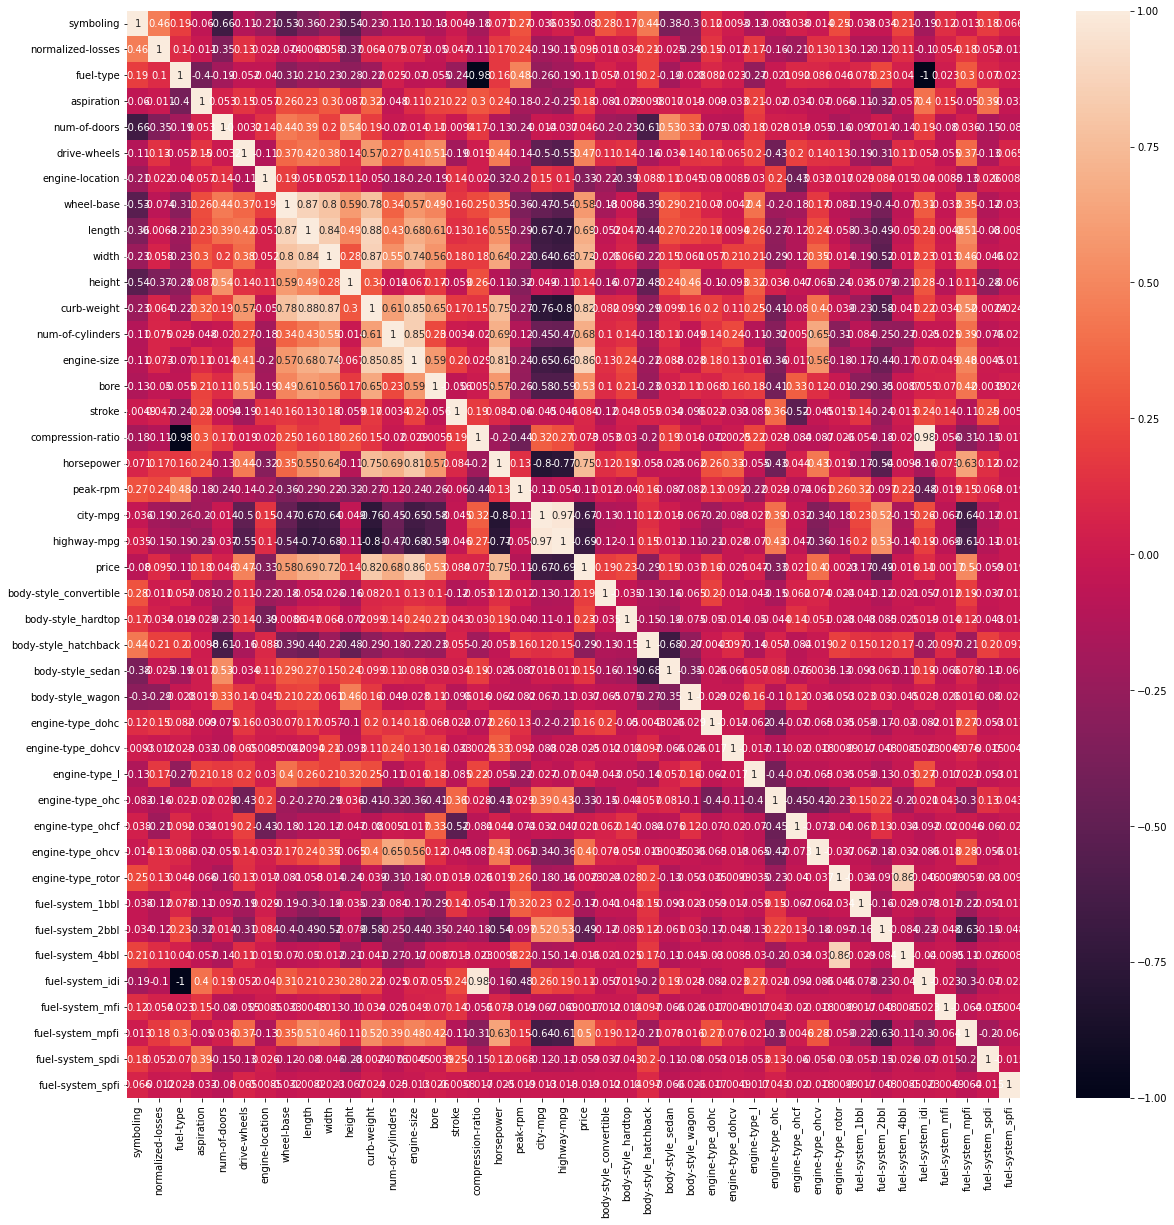

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    float64
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

# Train Test Split

In [76]:
x = df.drop("price", axis=1)
y = df['price']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=34)

In [82]:
x_train.shape

(164, 41)

In [83]:
x_test.shape

(41, 41)

# Model Training

## 1. Creating Instance of Model

In [84]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [85]:
# 'm' values
model.coef_

array([-1.88727763e+01,  1.59036199e+01, -4.36955409e+03,  1.18115136e+03,
       -8.97500967e+01,  4.04779260e+01, -7.62451820e+03,  1.22985111e+02,
       -6.07447628e+01,  5.60072779e+02,  3.81355748e+02,  2.75717848e+00,
       -3.40727884e+03,  2.61053688e+02, -1.18567842e+04, -8.74370737e+03,
       -6.02362854e+02,  3.00281154e+01,  2.00937605e+00,  8.89428780e+01,
        2.60228487e+01,  3.28676495e+03, -3.19036531e+02, -9.85038503e+02,
       -2.25457190e+02, -1.75723272e+03,  4.65378114e+02, -1.12267410e+04,
       -4.89589886e+02,  3.01269920e+03,  2.40749585e+03, -3.89492208e+03,
        9.72567978e+03, -8.51425282e+02, -6.72052614e+01,  1.80499948e+02,
        4.36955409e+03, -2.74131466e+03, -1.88316097e+02, -2.15236306e+03,
        1.45057032e+03])

In [86]:
# 'y' intercept
model.intercept_

-5689.181169528529

# Model Evaluation

In [88]:
y_pred = model.predict(x_test)
y_pred[20:25]

array([11145.861593  , 20225.5525414 , 11181.58217364,  8038.91250302,
        7476.14731518])

In [89]:
y_test[20:25]

123     8921.0
178    16558.0
3      13950.0
76      5389.0
79      7689.0
Name: price, dtype: float64

In [93]:
# Testing Dataset
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 14957825.671927586
RMSE : 3867.534831378715
MAE : 2432.6678909271723
R Squared : 0.7148417940528995


In [94]:
# training Data Set
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 4932870.406966657
RMSE : 2221.006620198746
MAE : 1583.5902778985296
R Squared : 0.923009311864952


# Testing on Single Row

In [108]:
column_names = x.columns
len(column_names)

41

In [97]:
x.head(1).T

,0
symboling,3.00
normalized-losses,115.00
fuel-type,1.00
aspiration,0.00
num-of-doors,2.00
drive-wheels,1.00
engine-location,1.00
wheel-base,88.60
length,168.80
width,64.10


In [123]:
print(fuel_type_value)
print(aspiration_value)
print(num_of_doors_values)
print(drive_wheels_values)

{'gas': 1, 'diesel': 0}
{'std': 0, 'turbo': 1}
{'four': 4, 'two': 2}
{'fwd': 0, 'rwd': 1, '4wd': 2}


In [140]:
# Values Entered by User
symboling = 3.00
normalized_losses = 120.00
fuel_type = 'gas'
aspiration = 'turbo'
num_of_doors = 'two'
drive_wheels = '4wd'
engine_location = 1.00
wheel_base = 88.60
length = 168.80
width = 64.10
height = 49.80
curb_weight = 2550.00
num_of_cylinders = 4.00
engine_size = 136.00
bore = 3.47
stroke = 2.68
compression_ratio = 9.00
horsepower = 120.00
peak_rpm = 6000.00
city_mpg = 21.00
highway_mpg = 27.00

# One hot encoded columns
body_style = "sedan"
engine_type = "ohc"
fuel_system = "mpfi"

make = "audi"

In [141]:
# Define Column Names

body_style_col = "body-style_" + body_style
engine_type_col = "engine-type_" + engine_type
fule_system_col = "fuel-system_" + fuel_system

print(body_style_col)
print(engine_type_col)
print(fule_system_col)

body-style_sedan
engine-type_ohc
fuel-system_mpfi


In [142]:
column_names

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [143]:
body_style_index = np.where(column_names == body_style_col)[0][0]
engine_type_index = np.where(column_names == engine_type_col)[0][0]
fuel_system_index = np.where(column_names == fule_system_col)[0][0]

print(body_style_index)
print(engine_type_index)
print(fuel_system_index)

24
29
38


In [116]:
array = np.zeros(len(column_names), dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [144]:
array[0] = symboling
array[1] = normalized_losses
array[2] = fuel_type_value[fuel_type]
array[3] = aspiration_value[aspiration]
array[4] = num_of_doors_values[num_of_doors]
array[5] = drive_wheels_values[drive_wheels]
array[6] = engine_location
array[7] = wheel_base
array[8] = length
array[9] = width
array[10] = height
array[11] = curb_weight
array[12] = num_of_cylinders
array[13] = engine_size
array[14] = bore
array[15] = stroke
array[16] = compression_ratio
array[17] = horsepower
array[18] = peak_rpm
array[19] = city_mpg
array[20] = highway_mpg


array[body_style_index] = 1
array[engine_type_index] = 1
array[fuel_system_index] = 1

array

array([   3,  120,    1,    1,    2,    2,    1,   88,  168,   64,   49,
       2550,    4,  136,    3,    2,    9,  120, 6000,   21,   27,    0,
          0,    0,    1,    0,    0,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0])

In [149]:
predicted_price = model.predict([array])[0]  # 2 D
print("Predicted Price of your Car :",predicted_price, "$")

Predicted Price of your Car : 31654.760298312605 $


In [154]:
list(column_names)

['symboling',
 'normalized-losses',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'body-style_convertible',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'engine-type_dohc',
 'engine-type_dohcv',
 'engine-type_l',
 'engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_rotor',
 'fuel-system_1bbl',
 'fuel-system_2bbl',
 'fuel-system_4bbl',
 'fuel-system_idi',
 'fuel-system_mfi',
 'fuel-system_mpfi',
 'fuel-system_spdi',
 'fuel-system_spfi']

In [155]:
# Store all this values in JSON


label_encoded_columns_dict = {"fuel_type_value":fuel_type_value, "aspiration_value": aspiration_value, 
                             "num_of_doors_values":num_of_doors_values, "drive_wheels_values":drive_wheels_values,
                             "column_names":list(column_names)}
label_encoded_columns_dict

{'fuel_type_value': {'gas': 1, 'diesel': 0},
 'aspiration_value': {'std': 0, 'turbo': 1},
 'num_of_doors_values': {'four': 4, 'two': 2},
 'drive_wheels_values': {'fwd': 0, 'rwd': 1, '4wd': 2},
 'column_names': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'body-style_convertible',
  'body-style_hardtop',
  'body-style_hatchback',
  'body-style_sedan',
  'body-style_wagon',
  'engine-type_dohc',
  'engine-type_dohcv',
  'engine-type_l',
  'engine-type_ohc',
  'engine-type_ohcf',
  'engine-type_ohcv',
  'engine-type_rotor',
  'fuel-system_1bbl',
  'fuel-system_2bbl',
  'fuel-system_4bbl',
  'fuel-system_idi',
  'fuel-system_mfi',
  'fuel-system_mpfi',
  'fuel-system_spdi',
  'fuel-system_spfi']}

In [156]:
import json

with open("Label_encoded_columns.json", "w") as f:
    json.dump(label_encoded_columns_dict, f)

In [157]:
model

LinearRegression()

In [158]:
# Save Model in Pickle File
import pickle

with open("Linear_model.pkl", "wb") as f:
    pickle.dump(model, f)